In [81]:
from __future__ import annotations

from matplotlib import pyplot as plt
import numpy as np

from plotting import process_chunk, process_samples

plt.style.use('ggplot')

NameError: name 'Any' is not defined

# Generated

Processing 2048 samples.


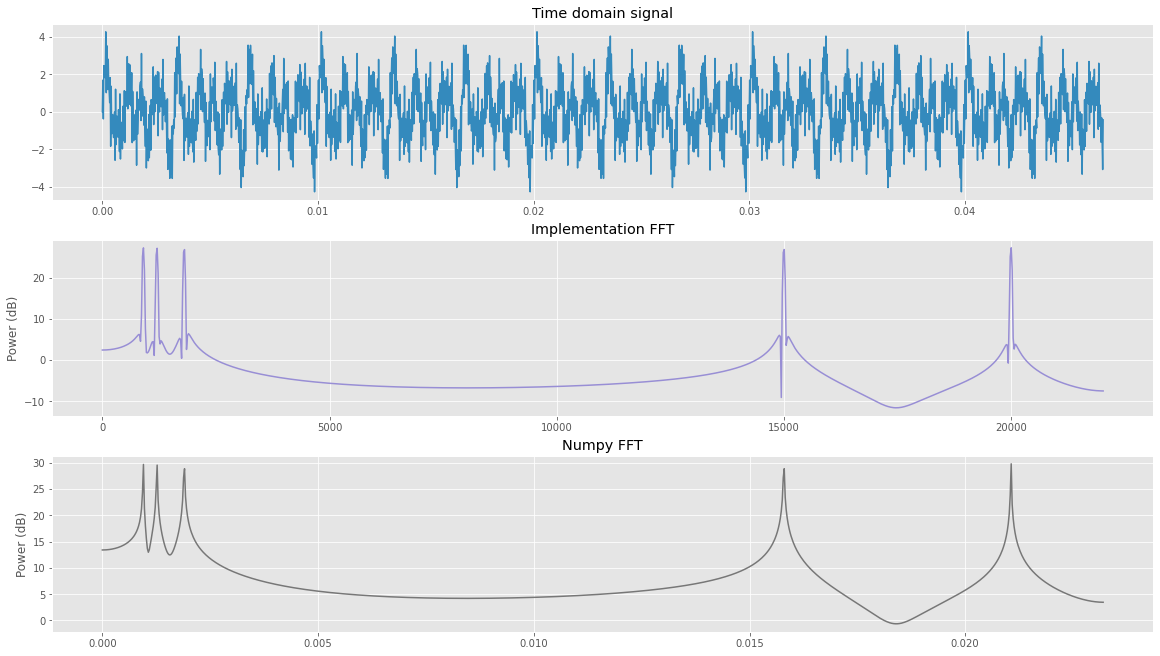

In [ ]:
indexes = np.arange(SAMPLE_RATE * CHUNK_TIME)
samples = (
    np.sin(2 * np.pi * indexes * 900 / SAMPLE_RATE)
    + np.sin(2 * np.pi * indexes * 1200 / SAMPLE_RATE)
    + np.sin(2 * np.pi * indexes * 1800 / SAMPLE_RATE)
    + np.sin(2 * np.pi * indexes * 15000 / SAMPLE_RATE)
    + np.sin(2 * np.pi * indexes * 20000 / SAMPLE_RATE)
).astype(DTYPE)
process_chunk(samples, 0)

# From samples

Processing 2048 samples.


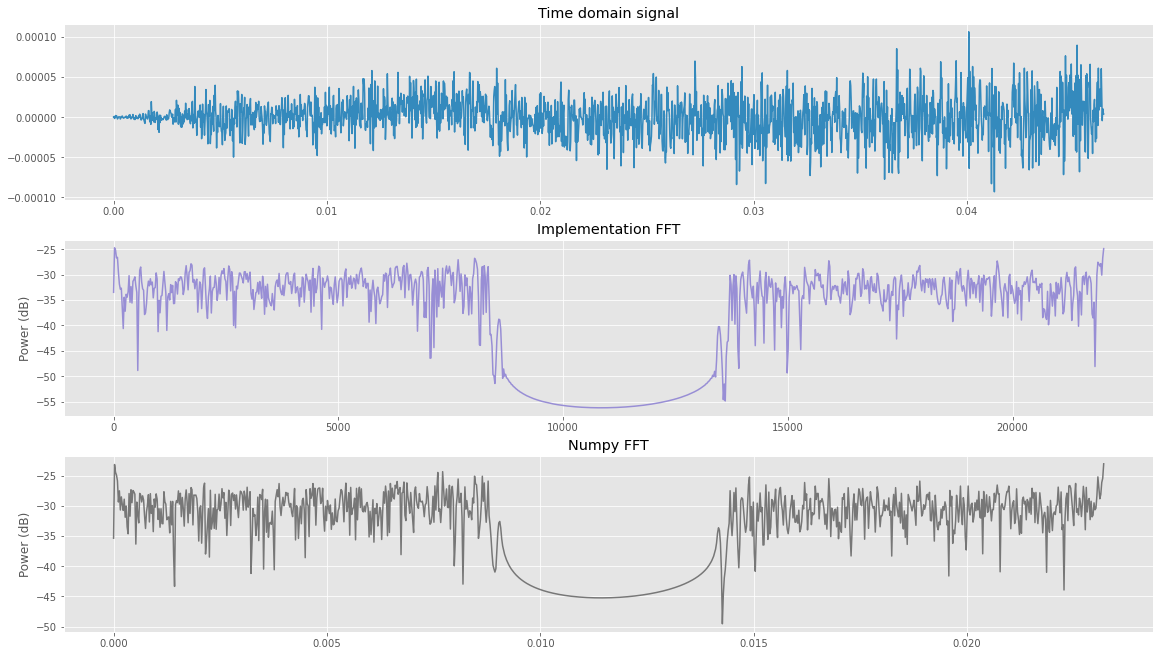

In [ ]:
real_samples = np.fromfile("raw.bin", dtype=DTYPE)

process_chunk(real_samples[:FFT_SIZE], 0)

# Whole file

Processing 19182592 samples.


<ipython-input-79-522ea323e1b0>:3: RuntimeWarning: divide by zero encountered in log10
  db_power = 10 * np.log10(fft_samples)
<ipython-input-76-048201180287>:58: RuntimeWarning: divide by zero encountered in log10
  db_power = 10 * np.log10(np_ampls)


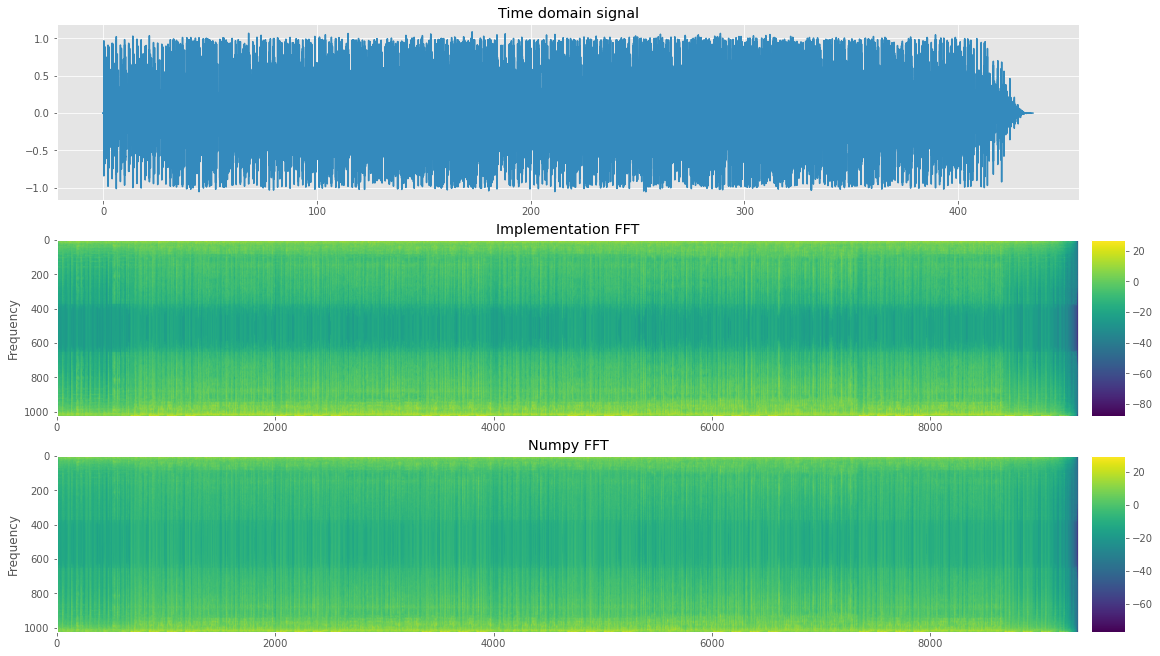

In [ ]:
fft_samples = process_samples(real_samples)
fft_samples = fft_samples.reshape((len(fft_samples) // FFT_OUT_SIZE, FFT_OUT_SIZE))
db_power = 10 * np.log10(fft_samples)

plot_series(0, real_samples, db_power)

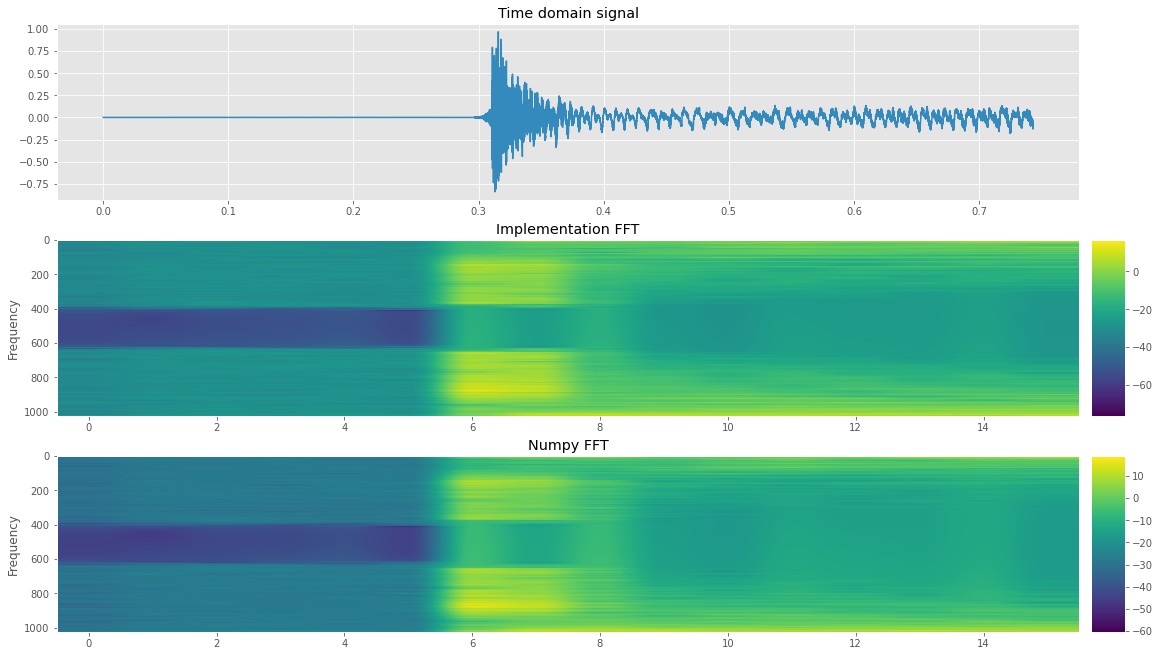

In [ ]:
slice_len = 16
plot_series(0, real_samples[:slice_len * FFT_SIZE], db_power[:slice_len])